#Problema de Classificação em que deseja-se identificar se um determinado cliente comparia ou não um produto usando SUV para checar essas informação

In [2]:
import pandas as pd
dados = pd.read_csv("https://raw.githubusercontent.com/ect-info/ml/master/dados/Social_Network_Ads.csv")
dados.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
dados = dados.drop("User ID",axis= 1)
dados.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [4]:
gender= {'Male' :0,'Female':1}
dados.Gender = [gender[item] for item in dados.Gender]  
dados.head(7)

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0
5,0,27,58000,0
6,1,27,84000,0


In [5]:
dados.describe()

,Gender,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000,400.000000
mean,0.510000,37.655000,69742.500000,0.357500
std,0.500526,10.482877,34096.960282,0.479864
min,0.000000,18.000000,15000.000000,0.000000
25%,0.000000,29.750000,43000.000000,0.000000
50%,1.000000,37.000000,70000.000000,0.000000
75%,1.000000,46.000000,88000.000000,1.000000
max,1.000000,60.000000,150000.000000,1.000000


#Os atributos que sarão escolhidos sarão idade, genero e o salário estimado

In [6]:
#Variável independente
X = dados.iloc[:,0:3 ].values
print(X[0:6, :])

[[    0    19 19000]
 [    0    35 20000]
 [    1    26 43000]
 [    1    27 57000]
 [    0    19 76000]
 [    0    27 58000]]


In [7]:
y = dados.iloc[:,3].values
print(y[0:6])

[0 0 0 0 0 0]


#Dividindo o conjunto de dados e normalizando

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

sc = MinMaxScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

#Treinamento do SVM usando kernel linear

In [9]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear')
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#Avaliando o modelo treinado
Para isso será usando matriz de confusão e métrica de precissão


In [10]:
y_pred = classifier.predict(X_test)

print(y_test[0:37])
print(y_pred[0:37])

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0]


In [11]:
from sklearn.metrics import accuracy_score
print("Acurácia: ", accuracy_score(y_test, y_pred)*100, "%")

Acurácia:  89.0 %


In [12]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Matrix de confusão: ")
print(cm)

Matrix de confusão: 
[[67  1]
 [10 22]]


#Visualizando os dados

In [13]:
from mpl_toolkits import mplot3d
X_set, y_set = X_train, y_train
X_set[y_set==0,0]

array([1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0.,
       1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
       1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1.,
       0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
       0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       1., 1.])

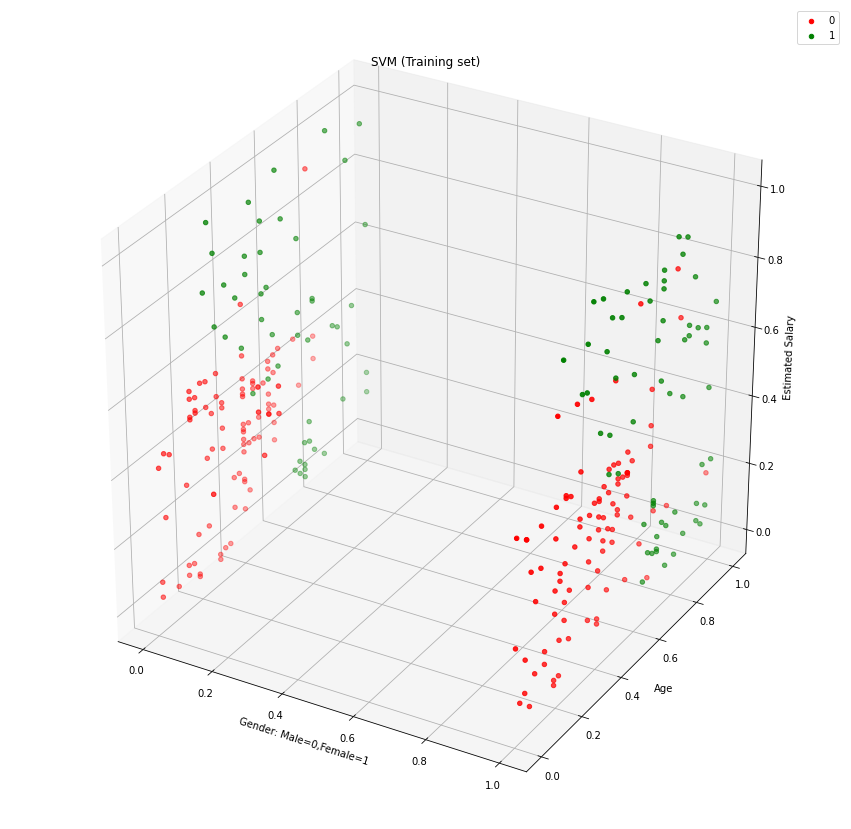

In [16]:
%matplotlib inline
from matplotlib import pyplot as plt
fig= plt.figure(figsize=(15,15))
axes = plt.axes(projection='3d')
# Pontos vermelhos e verdes
axes.scatter3D(X_set[y_set==0,0],X_set[y_set==0,1],X_set[y_set==0,2],color='red',label=0)
axes.scatter3D(X_set[y_set==1,0],X_set[y_set==1,1],X_set[y_set==1,2],color='green',label=1)
axes.set_title('SVM (Training set)')
axes.set_xlabel('Gender: Male=0,Female=1')
axes.set_ylabel('Age')
axes.set_zlabel('Estimated Salary')
axes.legend()

Gostaria de ressaltar a ajuda do colega de turma Elton Rafael, que foi de grande ajuda para esse trabalho